# ADS 509 Sentiment Assignment




## General Assignment Instructions




In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

In [2]:
# Add any additional import statements you need here

from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import emoji
import seaborn as sns
import advertools as adv




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/fatemehkhosravi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/fatemehkhosravi/Desktop/Assignment6/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 


In [4]:
# Read in the lyrics data

#!find . -name "*.DS_Store" -type f -delete

# Read in the lyrics data

lyrics_data= {"artist":[], "song":[],"lyrics": []} 
lyrics_path=data_location+lyrics_folder
for artist in os.listdir(lyrics_path):
     for song in os.listdir(os.path.join (lyrics_path+artist)):
             song_name= song.split("_")[1].split(".")[0]
             with open (os.path.join(lyrics_path+artist, song),'r') as f:
                 lyric=f.read()
             lyrics_data['artist'].append(artist) 
             lyrics_data['song'].append(song_name) 
             lyrics_data['lyrics'].append(lyric)
            

# convert dictionary to data frame

lyrics_data=pd.DataFrame(lyrics_data)
lyrics_data.head()

,artist,song,lyrics
0,robyn,includemeout,"""Include Me Out""\n\n\n\nIt is really very simp..."
1,robyn,electric,"""Electric""\n\n\n\nElectric...\n\nIt's electric..."
2,robyn,beach2k20,"""Beach 2K20""\n\n\n\n(So you wanna go out?\nHow..."
3,robyn,lovekills,"""Love Kills""\n\n\n\nIf you're looking for love..."
4,robyn,timemachine,"""Time Machine""\n\n\n\nHey, what did I do?\nCan..."


In [5]:
# Read in the twitter data

twitter_files = os.listdir(data_location + twitter_folder) 
desc_files = [f for f in twitter_files if "followers_data" in f] 
tweets_data= {"artist":[], "description":[]} 
for f in desc_files :
    artist = f.split("_")[0]
    with open(data_location + twitter_folder + f,'r', encoding='utf8') as infile : 
        next(infile)
        for idx, line in enumerate(infile.readlines()) : 
            line = line.strip().split("\t")
            description = line[-1] 
            tweets_data['artist'].append(artist) 
            tweets_data['description'].append(description )

            
# convert dictionary to data frame

tweets_data=pd.DataFrame(tweets_data)
tweets_data.head()

,artist,description
0,cher,1014
1,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
2,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
3,cher,csu
4,cher,Writer @Washinformer @SpelmanCollege alumna #D...


In [6]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

positive_words=[]
negative_words=[]


with open('positive-words.txt' ,'r', encoding='utf8') as f : 
        positive=f.readlines()

        
with open('negative-words.txt' ,'r', encoding='utf8') as f : 
        negative=f.readlines()
        
        

for line in positive:
    if ';' not in line and line!= '\n': 
        positive_words.append(line.strip())
        
        
for line in negative:
    if ';' not in line and line!= '\n':
        negative_words.append(line.strip())
        
        
        
#create a dictionary of scores

sentiment_dict={'word':[], 'score':[]}

for word in positive_words:
    sentiment_dict['word'].append(word)
    sentiment_dict['score'].append(1)
    
for word in negative_words:
    sentiment_dict['word'].append(word)
    sentiment_dict['score'].append(-1)
    

# convert dictionary to data frame

sentiment_df=pd.DataFrame(sentiment_dict)
sentiment_df.head()

,word,score
0,a+,1
1,abound,1
2,abounds,1
3,abundance,1
4,abundant,1


## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [7]:
#Albrecht, J., Ramachandran, S., Winkler, C. Blueprints for Text Analytics Using Python (p. 303).

pos_score = 1
neg_score = -1
word_dict = sentiment_df.set_index('word').to_dict()['score']



def bing_liu_score(text):
    sentiment_score = 0
    bag_of_words = word_tokenize(text.lower()) 
    
    for word in bag_of_words:
        if word in word_dict:
            sentiment_score += word_dict[word]
    
    return (sentiment_score/len(bag_of_words))

In [8]:
lyrics_data['sentiment_score'] = lyrics_data['lyrics'].apply (bing_liu_score)
lyrics_data.sample(10)

,artist,song,lyrics,sentiment_score
344,cher,crymyselftosleep,"""Cry Myself To Sleep""\n\n\n\nEvery night, I la...",-0.097222
106,cher,stars,"""Stars""\n\n\n\nI was never one for saying what...",-0.003030
15,robyn,dontstopthemusic,"""Don't Stop The Music""\n\n\n\nThis little girl...",0.021407
129,cher,awomansstory,"""A Woman's Story""\n\n\n\nThere are many who ha...",0.030534
149,cher,ificouldturnbacktime,"""If I Could Turn Back Time""\n\n\n\nIf I could ...",0.004902
335,cher,bornwiththehunger,"""Born With The Hunger""\n\n\n\nHear the coyote ...",-0.052083
286,cher,yoursuntiltomorrow,"""Yours Until Tomorrow""\n\n\n\nTonight I hold t...",-0.005051
281,cher,walkwithme,"""Walk With Me""\n\n\n\nStanding all alone insid...",0.000000
228,cher,afterall,"""After All""\n\n\n\nWell, here we are again\nI ...",-0.003195
259,cher,sendthemanover,"""Send The Man Over""\n\n\n\nIn a rented room \n...",-0.007042


In [9]:
# average sentiment score per artist

lyrics_data.groupby(['artist']).mean()

,sentiment_score
artist,
cher,0.013517
robyn,0.008758


In [10]:
# highest sentiment scores for Cher

cher_song=lyrics_data.loc[lyrics_data['artist']=='cher']
highest_cher=cher_song.sort_values('sentiment_score', ascending=False).head(3)
highest_cher

,artist,song,lyrics,sentiment_score
119,cher,mylove,"""My Love""\n\n\n\nWhen I go away\nI know my hea...",0.222222
241,cher,moveme,"""Move Me""\n\n\n\nMove me\nLove the way you mov...",0.155172
250,cher,loveandunderstanding,"""Love And Understanding""\n\n\n\nHere, here in ...",0.141479


In [11]:
# lowest sentiment scores for Cher

lowest_cher=cher_song.sort_values('sentiment_score', ascending=True).head(3)
lowest_cher

,artist,song,lyrics,sentiment_score
344,cher,crymyselftosleep,"""Cry Myself To Sleep""\n\n\n\nEvery night, I la...",-0.097222
262,cher,outrageous,"""Outrageous""\n\n\n\nOutrageous, outrageous\n(T...",-0.084806
275,cher,iwalkonguildedsplinters,"""I Walk On Guilded Splinters""\n\n\n\nSome peop...",-0.075301


In [12]:
# print lyrics of Cher

print(highest_cher['lyrics'][119].replace('\n', ''))
print ('\n')
print(highest_cher['lyrics'][241].replace('\n', ''))
print ('\n')
print(highest_cher['lyrics'][250].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][344].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][262].replace('\n', ''))
print ('\n')
print(lowest_cher['lyrics'][275].replace('\n', ''))

"My Love"When I go awayI know my heart can stay with my loveIt's understoodEverywhere with my loveMy love does it good, whoaMy love, oh only my loveMy love does it goodAnd when the cupboard's bareI'll still find something there with my loveIt's understoodEverywhere with my loveMy love does it so good, whoaMy love, oh only my loveMy love does it goodOnly my love, oh only my loveOnly my love, hold the other things to meOh, only my love, oh only my loveOnly my love does it good to meEverywhere with my loveDon't you see my loveIt does it so goodOh, only my love, only my loveMy love does it goodDon't ever ask me whyI never say "good-bye" to my loveIt's understood'Cause everywhere with my loveMy love does it good, whoaOnly my love, oh only my loveMy love does it goodOh only my loveOnly my love does it good to me,whoa


"Move Me"Move meLove the way you move me, babyGroove meLove the way you groove meMaking love with youLittle things that you doMake me feel so good insideOh oh do meC'mon, c'mo

In [13]:
# highest sentiment scores for Robyn

robyn_song=lyrics_data.loc[lyrics_data['artist']=='robyn']
highest_robyn=robyn_song.sort_values('sentiment_score', ascending=False).head(3)
highest_robyn

,artist,song,lyrics,sentiment_score
21,robyn,loveisfree,"""Love Is Free""\n\n\n\nFree\nLove is free, baby...",0.180212
73,robyn,indestructible,"""Indestructible""\n\n\n\nI'm going backwards th...",0.070081
99,robyn,doyoureallywantmeshowrespect,"""Do You Really Want Me (Show Respect)""\n\n\n\n...",0.065844


In [14]:
# lowest sentiment scores for Robyn

lowest_robyn=robyn_song.sort_values('sentiment_score', ascending=True).head(3)
lowest_robyn

,artist,song,lyrics,sentiment_score
75,robyn,dontfuckingtellmewhattodo114520,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",-0.170354
53,robyn,dontfuckingtellmewhattodo,"""Don't Fucking Tell Me What To Do""\n\n\n\nMy d...",-0.170354
16,robyn,criminalintent,"""Criminal Intent""\n\n\n\nSomebody alert the au...",-0.103113


In [16]:
# print lyrics of Robyn

print(highest_robyn['lyrics'][21].replace('\n', ''))
print ('\n')
print(highest_robyn['lyrics'][73].replace('\n', ''))
print ('\n')
print(highest_robyn['lyrics'][99].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][75].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][53].replace('\n', ''))
print ('\n')
print(lowest_robyn['lyrics'][16].replace('\n', ''))

"Love Is Free"FreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyChica boom chica boom chica boomChica boom chica boom chica boomFreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyI'ma give it to you, babyI'ma give it when I'm readySome lose, some steadySome light, some heavyIt's all over this citySometimes in the ugly, sometimes in the prettyYou never know where you get it cause you can't control it and you can't unfold it, slow downI'ma give it to you, babyI'ma give it when I'm readySome lose, some steadySome light, some heavyIt's all over this citySometimes in the ugly, sometimes in the prettyYou never know where you get it cause you can't control it and you can't unfold it, slow downFreeLove is free, babyFreeLove is free, babyBoom boom boom boom boom chica boomLet me give it to you, babyYeah! Yeah! Yeah! Yeah!Love is free, babyLove is free, babyI'ma give it to you, babyI'ma

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Cher with 0.013 average sentiment score.

---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: 3 songs of Cher with highest sentiment scores are : 'my love', 'move me' and 'love and understanding'. 3 songs of 

Cher with lowest sentiment scores are 'cry my self to sleep', 'outrageous' and 'i walk on guilded splinters'. It 

can be clearly seen that the lyrics that have a higher sentiment score or are generally positive, include words 

that are positive in terms of meaning such as love and good. In top 3 songs of Cher with highest sentiment scores 

the word of love is repeated a lot. Among the lyrics with the lowest sentiment score, or in other words, the 

category of negatives, we can see that the words have a negative and disappointing meaning, such as outrageous, 

kill, lies, funky, burn, poison and etc.
 


---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: 3 songs of Robyn with highest sentiment score are ' love is free' , 'indestructible' and 'do you really want me 

show respect'. 2 songs of Robyn with lowest sentiment score are 'dont fucking tell me what to do' and 'criminal 

intent'. 
I have no idea why two lyrics are repeated in the results of the lowest sentiment score for Robyn. Maybe I should 

check the duplicated data in very initial steps of preprocessing. Here I can see like Cher’s song; the highest 

sentiment scores are related to those lyrics which contain word of ‘love’.  Other words like free, baby can be seen

in the positive category. However, we can find some words with negative meaning like bad, mutter among lyrics with

the high sentiment score but I think these results are related to a general theme of the song and not just a 

specific sentence in the lyrics. 


---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.




2023-06-19 23:16:25,180 | INFO | utils.py:141 | _init_num_threads | NumExpr defaulting to 8 threads.


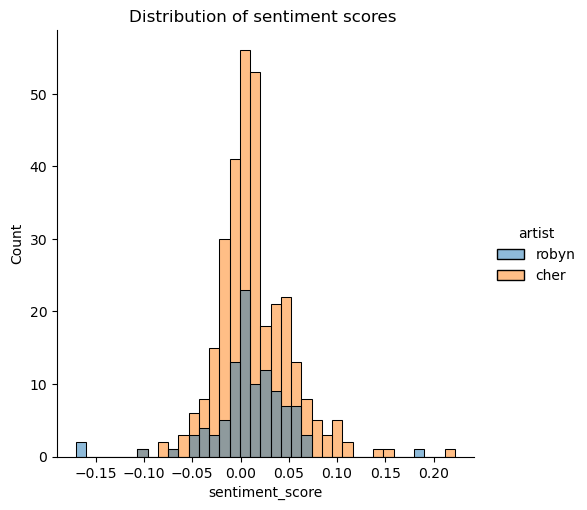

In [17]:
sns.displot(lyrics_data, x= 'sentiment_score', fill= True, hue= 'artist').set(title= 'Distribution of sentiment scores ')

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [18]:

pos_emojis={ '♥️': +1 ,'😍' : +1, '💗' : +1, '🥰':+1, '😘':+1, '💓':+1,
            '✌️':+1, '😇':+1 , '💕':+1, '👏' :+1,'😀':+1,'💯':+1,'🙏🏼':+1,'💖':+1 }

neg_emojis={'💔':-1, '😭':-1, '😔':-1, '🖤':-1, '😱':-1,  '😡':-1, 
            '😈': -1,  '😤':-1, '😱':-1 , '😢':-1,'😔':-1,'☹️':-1}

emoji_dict={**pos_emojis,**neg_emojis}
emoji_dict

{'♥️': 1,
 '😍': 1,
 '💗': 1,
 '🥰': 1,
 '😘': 1,
 '💓': 1,
 '✌️': 1,
 '😇': 1,
 '💕': 1,
 '👏': 1,
 '😀': 1,
 '💯': 1,
 '🙏🏼': 1,
 '💖': 1,
 '💔': -1,
 '😭': -1,
 '😔': -1,
 '🖤': -1,
 '😱': -1,
 '😡': -1,
 '😈': -1,
 '😤': -1,
 '😢': -1,
 '☹️': -1}

In [20]:
tweets_data['emoji']=tweets_data['description'].map(emoji.distinct_emoji_list)


# count emojies from our created dictionary of emojies

def emoji_counts(text):
    sentiment_score = 0
    bag_of_emoji = text
    for emoji in bag_of_emoji :
        if emoji in emoji_dict :
            sentiment_score+=emoji_dict[emoji]
    return (sentiment_score)


In [36]:
tweets_data['emoji_count']= tweets_data['emoji'].apply(emoji_counts)
tweets_data.sample(10)

,artist,description,emoji,emoji_count
546371,cher,zig-a-zig-ah She/her they/them,[],0
2370235,cher,I love and live,[],0
319978,cher,65,[],0
115626,cher,♏ 👅✈️,"[♏, ✈️, 👅]",0
4247319,robynkonichiwa,6,[],0
3674612,cher,https://t.co/5tb2zdg5tE… (my free tutorial on ...,[],0
3464938,cher,I my not be the Greatest man you'll have but I...,[],0
626527,cher,taken 4.4.16👨‍👩‍👧‍👧💍👑💯💗 Matherson Family,"[👨‍👩‍👧‍👧, 💗, 💯, 👑, 💍]",2
4023587,robynkonichiwa,Sneaker crazy! Innovation & payments. Even act...,[],0
574669,cher,638,[],0


In [37]:
# the number of followers for each singer

cher_follower=len(tweets_data.loc[tweets_data['artist']=='cher'] )
robyn_follower=len(tweets_data.loc[tweets_data['artist']=='robynkonichiwa'] )

# The average sentiment for Cher

cher_counts=tweets_data.loc[tweets_data['artist']=='cher', 'emoji_count']
cher_average_sentiment=sum(cher_counts)/cher_follower


# The average sentiment for Robyn

robyn_counts=tweets_data.loc[tweets_data['artist']=='robynkonichiwa', 'emoji_count']
robyn_average_sentiment=sum(robyn_counts)/robyn_follower



#create a dataframe of results

emoji_sentiment_score={'artist':['Cher','Robyn'], 'total_emojies' :[sum(cher_counts),sum(robyn_counts)],
                       'average_sentiment_emoji':[cher_average_sentiment,robyn_average_sentiment]}
                       
emoji_sentiment_score_df=pd.DataFrame(data=emoji_sentiment_score)
emoji_sentiment_score_df                      

,artist,total_emojies,average_sentiment_emoji
0,Cher,39095,0.009786
1,Robyn,1592,0.004442


Q: What is the average sentiment of your two artists? 

A: The average sentiment for Cher is 0.0097 and the average sentiment for Robyn is 0.0044.

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: In the code snippet below we can see the top 3 positive and negative emojis for 2 artists.



In [38]:
#cher

cher_pos_emojis=[]
cher_neg_emojis=[]

cher_emojis=tweets_data.loc[tweets_data['artist']=='cher', ['emoji','emoji_count']]
cher_emojis=list(cher_emojis['emoji'])
flat_emojis_cher = [element for innerList in cher_emojis for element in innerList]

for element in flat_emojis_cher:
    if element in pos_emojis:
        cher_pos_emojis.append(element)
    if element in neg_emojis:
        cher_neg_emojis.append(element)
        
        
# robyn


robyn_pos_emojis=[]
robyn_neg_emojis=[]

robyn_emojis=tweets_data.loc[tweets_data['artist']=='robynkonichiwa', ['emoji','emoji_count']]
robyn_emojis=list(robyn_emojis['emoji'])
flat_emojis_robyn = [element for innerList in robyn_emojis for element in innerList]

for element in flat_emojis_robyn:
    if element in pos_emojis:
        robyn_pos_emojis.append(element)
    if element in neg_emojis:
        robyn_neg_emojis.append(element)
        
        

print( 'most popular positive emojis for cher are:', Counter(cher_pos_emojis).most_common(3) ) 
print('\n')
print( 'most popular negative emojis for cher are:', Counter(cher_neg_emojis).most_common(3) )  
print('\n')
print( 'most popular positive emojis for robyn are:', Counter(robyn_pos_emojis).most_common(3) ) 
print('\n')
print( 'most popular negative emojis for robyn are:', Counter(robyn_neg_emojis).most_common(3) ) 

most popular positive emojis for cher are: [('💕', 9147), ('💖', 7056), ('😍', 6167)]


most popular negative emojis for cher are: [('🖤', 9211), ('😈', 2012), ('💔', 1321)]


most popular positive emojis for robyn are: [('💕', 375), ('✌️', 368), ('💖', 360)]


most popular negative emojis for robyn are: [('🖤', 517), ('😈', 107), ('💔', 54)]
